In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

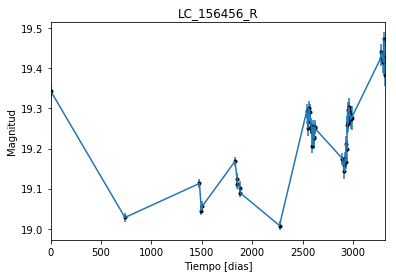

In [2]:
data = np.genfromtxt('LC_156456_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_156456_R')
plt.savefig("LC_156456_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

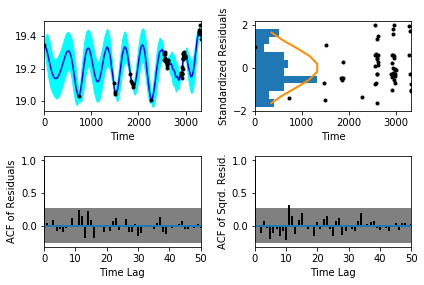

In [5]:
sample.assess_fit()

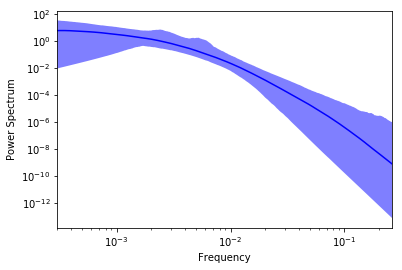

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

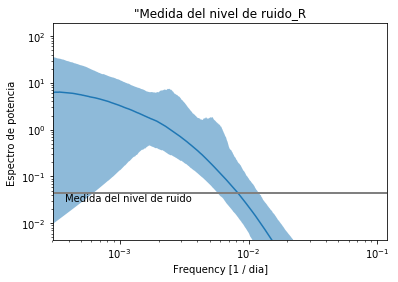

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_156456_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_156456_R')

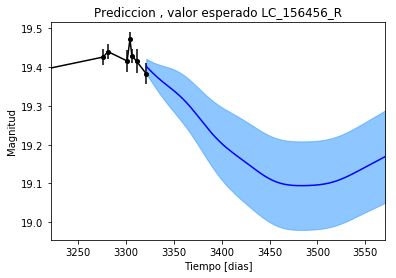

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_156456_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_156456_R')

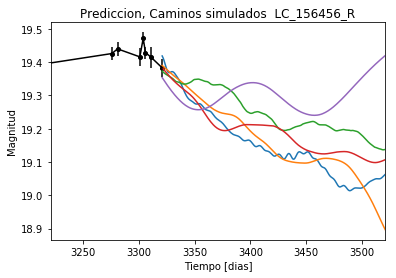

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_156456_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


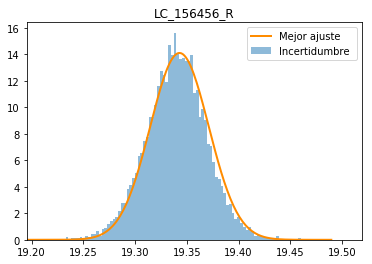

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_156456_R')
plt.savefig("Mejor_ajuste_LC_156456_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_156456_R')

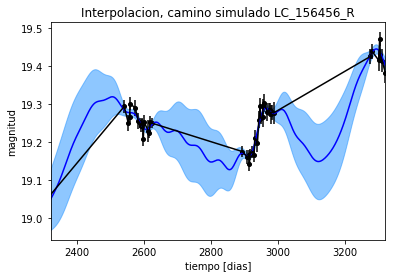

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_R')

Text(0.5,1,'Interpolacion, camino simulado LC_156456_R')

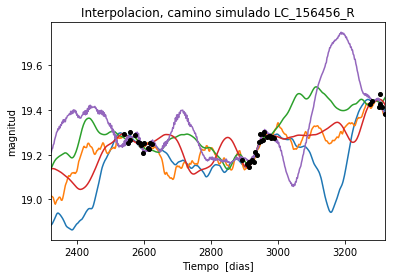

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_156456_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 438.319108377
Median: 0.009497988655
Standard deviation: 0.109729932016
68% credibility interval: [ 0.00131037  0.13282   ]
95% credibility interval: [  3.71207830e-04   4.25596554e-01]
99% credibility interval: [  3.16555744e-04   5.02823496e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 271.048573757
Median: 0.00284909245638
Standard deviation: 0.0443573415151
68% credibility interval: [ 0.00059611  0.01613648]
95% credibility interval: [ 0.00033133  0.14622412]
99% credibility interval: [  3.06193501e-04   3.44009341e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 441.695695949
Median: 0.0198439661507
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2309.73184852
Median: 133.644247703
Standard deviation: 1.61954232393
68% credibility interval: [ 131.86461464  134.78749444]
95% credibility interval: [ 129.34195574  135.45035819]
99% credibility interval: [ 127.15860318  135.76977732]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 360.053470642
Median: 0.474634460186
Standard deviation: 1.15818718709
68% credibility interval: [ 0.08490587  2.25582581]
95% credibility interval: [ 0.02693194  4.01819611]
99% credibility interval: [ 0.01576023  5.22714233]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 463.66499321
Median: 0.11635376855
Standard deviation: 2.18301666992
68% credibility interval: [ 0.00757633  1.98394068]
95% credibility interval: [  2.27542112e-03 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 745.479653846
Median: 3.32486437988e-16
Standard deviation: 2.62181759979e+148
68% credibility interval: [  4.98532797e-71   1.29153561e+70]
95% credibility interval: [  9.76205905e-166   1.43962016e+140]
99% credibility interval: [  1.68664615e-171   8.42898802e+148]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1716.35204953
Median: 19.2040115859
Standard deviation: 0.0640167076422
68% credibility interval: [ 19.14936217  19.25916473]
95% credibility interval: [ 19.07478776  19.33213012]
99% credibility interval: [ 18.99930114  19.4046391 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 650.082232344
Median: 0.00320097266234
Standard deviation: 0.116494949094
68% credibility interval: [ 0.          0.12330559]
95% credibility interval: [ 0.          0.44717229]
99% credibility interval: [ 0.          0.50420892]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 650.082232344
Median: 0.00320097266234
Standard deviation: 0.116494949094
68% credibility interval: [ 0.          0.12330559]
95% credibility interval: [ 0.          0.44717229]
99% credibility interval: [ 0.          0.50420892]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 509.785038212
Median: 0.0
Standard deviation: 0.00100482890245
68% c

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2309.73184852
Median: 133.644247703
Standard deviation: 1.61954232393
68% credibility interval: [ 131.86461464  134.78749444]
95% credibility interval: [ 129.34195574  135.45035819]
99% credibility interval: [ 127.15860318  135.76977732]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2201.50816315
Median: 0.0222616215445
Standard deviation: 0.0185867525542
68% credibility interval: [ 0.01427887  0.03850667]
95% credibility interval: [ 0.01001427  0.07130624]
99% credibility interval: [ 0.00802598  0.11682016]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1676.41392812
Median: 0.940961400031
Standard deviation: 0.150136518696
68% credibility interval: [ 0.81171812  1.10116491]
95% credibility interval: [ 0.70690092  1.29350393]
99% credibility interval: [ 0.64031157  1.44438237]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 654.293538236
Median: 6.25613683721e-05
Standard deviation: 0.00201615190137
68% credibility interval: [  1.25182672e-74   1.43980721e-03]
95% credibility interval: [  4.69182666e-145   6.90166436e-003]
99% credibility interval: [  1.58910527e-152   1.16137541e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 438.319108377
Median: (-0.0596776227649-0.0926281484577j)
Standard deviation: 1.00553996325
68% credibility interval: [-0.83453265-1.81864747j -0.00823333-1.34647794j]
95% credibility interval: [ -2.67410202e+00+0.j          -2.33236759e-03-0.95548588j]
99% credibility interval: [ -3.15933320e+00+0.j          -1.98897840e-03-0.03554161j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 271.048573757
Median: (-0.0179013758607+0.0539972737996j)
Standard deviation: 0.783224866654
68% credibility interval: [-0.10138852+0.j -0.00374548+0.j]
95% credibility interval: [-0.91875322+3.08346608j -0.00208178+0.j        ]
99% credibility interval: [ -2.16147443e+00+3.2645673j  -1.92387051e-03+0.j       ]
Posterior summary for param